## Context

AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customer queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.

 

## Objective

To identify different segments in the existing customer, based on their spending patterns as well as past interaction with the bank, using clustering algorithms, and provide recommendations to the bank on how to better market to and service these customers.

 

## Data Description

The data provided is of various customers of a bank and their financial attributes like credit limit, the total number of credit cards the customer has, and different channels through which customers have contacted the bank for any queries (including visiting the bank, online and through a call center).

## Data Dictionary

* Sl_No: Primary key of the records
* Customer Key: Customer identification number
* Average Credit Limit: Average credit limit of each customer for all credit cards
* Total credit cards: Total number of credit cards possessed by the customer
* Total visits bank: Total number of visits that customer made (yearly) personally to the bank
* Total visits online: Total number of visits or online logins made by the customer (yearly)
* Total calls made: Total number of calls made by the customer to the bank or its customer service department (yearly)

## Loading the necessary libraries

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import pdist
# to compute distances
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform PCA
from sklearn.decomposition import PCA

In [2]:
# loading the dataset
df = pd.read_excel("CreditCardCustomerData.xlsx")

In [3]:
data=df.copy()# copying the original data for working 

In [4]:
data.head()# first 5 entries

Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
0      1         87073            100000                   2   
1      2         38414             50000                   3   
2      3         17341             50000                   7   
3      4         40496             30000                   5   
4      5         47437            100000                   6   

   Total_visits_bank  Total_visits_online  Total_calls_made  
0                  1                    1                 0  
1                  0                   10                 9  
2                  1                    3                 4  
3                  1                    1                 4  
4                  0                   12                 3

In [5]:
data.tail()# last 5 entries

Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
655    656         51108             99000                  10   
656    657         60732             84000                  10   
657    658         53834            145000                   8   
658    659         80655            172000                  10   
659    660         80150            167000                   9   

     Total_visits_bank  Total_visits_online  Total_calls_made  
655                  1                   10                 0  
656                  1                   13                 2  
657                  1                    9                 1  
658                  1                   15                 0  
659                  0                   12                 2

In [6]:
data.isna().sum()# checking to find all the null values in the columns 

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

There are no null values in any of the columns 

In [7]:
data.info()# to get the basic information about columns like null values and datatyes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


There are no null values and all the columns are in the correct datatypes

In [8]:
data.describe().round(1).T # to find mean,min,max,25%,50%,75%,std and count of all the columns 

count     mean      std      min      25%      50%  \
Sl_No                660.0    330.5    190.7      1.0    165.8    330.5   
Customer Key         660.0  55141.4  25627.8  11265.0  33825.2  53874.5   
Avg_Credit_Limit     660.0  34574.2  37625.5   3000.0  10000.0  18000.0   
Total_Credit_Cards   660.0      4.7      2.2      1.0      3.0      5.0   
Total_visits_bank    660.0      2.4      1.6      0.0      1.0      2.0   
Total_visits_online  660.0      2.6      2.9      0.0      1.0      2.0   
Total_calls_made     660.0      3.6      2.9      0.0      1.0      3.0   

                         75%       max  
Sl_No                  495.2     660.0  
Customer Key         77202.5   99843.0  
Avg_Credit_Limit     48000.0  200000.0  
Total_Credit_Cards       6.0      10.0  
Total_visits_bank        4.0       5.0  
Total_visits_online      4.0      15.0  
Total_calls_made         5.0      10.0

### Observations:
* The mean credit limit is 37625 and 50% of the customers have 18000
* The mean credit cards customers have is 5 and 50% of the customers have 5
* The mean visits to the bank is  2 and 50% of the customers have 2
* The mean online visits is 3 and 50% of the customers have 2
* The mean of the calls made  is 4 and 50% of the customers have 3

In [9]:
data.duplicated().sum() # checking for any duplicates

0

There is no duplicated data entry

In [10]:
# To see the unique columns
cols = data.columns

print(cols)


Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')


In [11]:
# To see the unique values in each column
for col in cols:
    print(data[col].unique())
    print("-" * 100)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246 24

In [12]:
data.isnull().sum()# checking for null values in all the columns

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [13]:
cat_cols=['Avg_Credit_Limit','Total_Credit_Cards','Total_visits_bank','Total_visits_online','Total_calls_made']

for column in cat_cols:
    print(data[column].value_counts())
    print('-'*30)

8000      35
6000      31
9000      28
13000     28
10000     26
19000     26
7000      24
11000     24
18000     23
14000     23
17000     23
16000     22
5000      21
20000     20
12000     18
15000     17
36000     11
70000     10
38000      8
50000      8
56000      7
39000      7
68000      7
52000      6
37000      6
34000      6
30000      6
74000      6
47000      6
48000      6
41000      6
60000      5
29000      5
26000      5
65000      5
31000      5
54000      4
51000      4
59000      4
73000      4
71000      4
49000      4
69000      4
64000      4
66000      4
33000      4
28000      3
67000      3
62000      3
100000     3
72000      3
61000      3
58000      3
44000      3
45000      3
46000      3
57000      3
40000      3
163000     2
84000      2
27000      2
32000      2
75000      2
42000      2
166000     2
156000     2
172000     2
195000     2
35000      2
63000      2
123000     1
171000     1
186000     1
157000     1
126000     1
121000     1
144000     1

### Observations 
* 35 customers have an Average credit limit of customers is 8000
* 151 customers have 4 credit cards
* Most customers have visited the bank  2 times
* Most of the customers visit the bank online 2 times
* 108 customers have called the bank 4 times 

## EDA

## Univariate Analysis

In [14]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="blue", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram
   

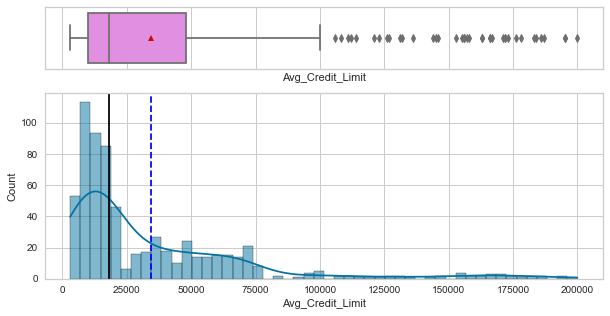

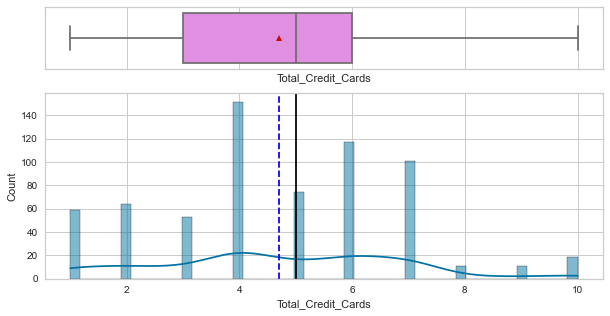

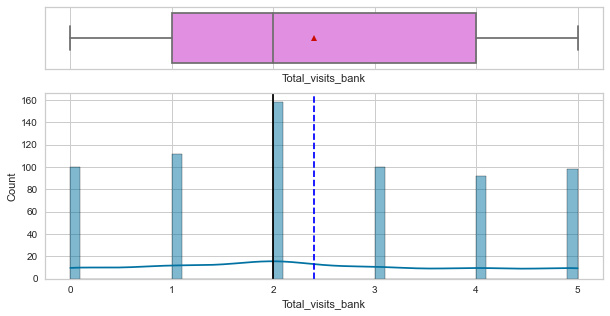

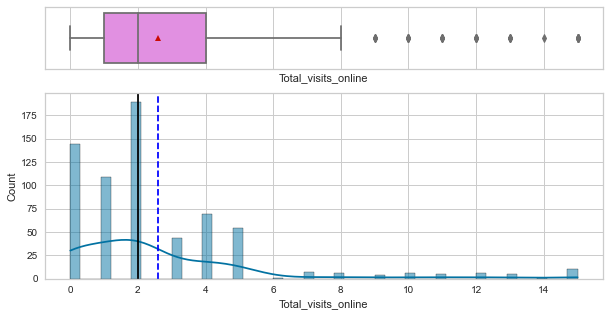

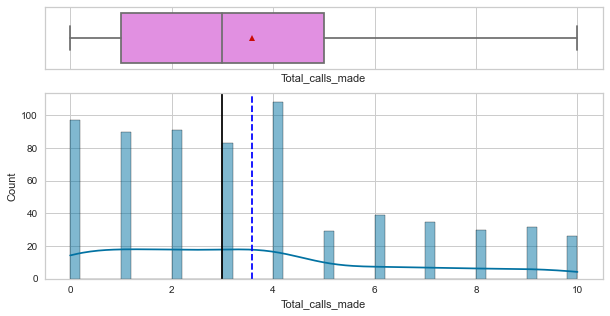

In [15]:
for item in cat_cols:
    histogram_boxplot(data, item, bins=50, kde=True, figsize=(10, 5))

* Average credit limit is left skewed with outliers 
* Total calls made is left skewed
* Total credit cards the mean and the median are closser to each other 

In [16]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(z):

    total = len(data[z]) # length of the column
    plt.figure(figsize=(15,5))
    ax = sns.countplot(data[z],palette='Paired')
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

/Users/sajimon.baby/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


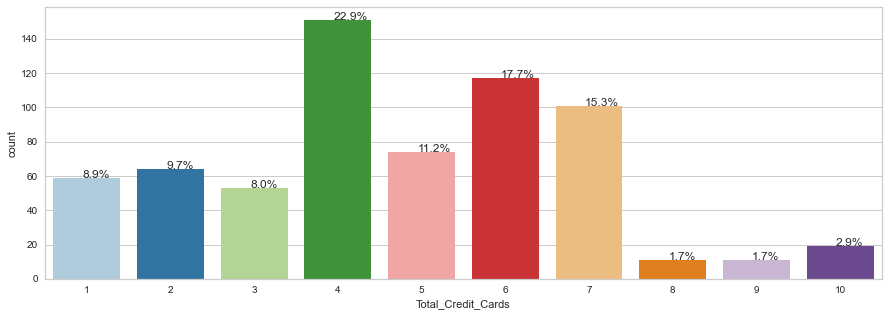

In [17]:
perc_on_bar('Total_Credit_Cards') # plotting Occupation

* 22.9% customers have 4 credit cards follwed by 17.7% customers with 6 credit cards 

/Users/sajimon.baby/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


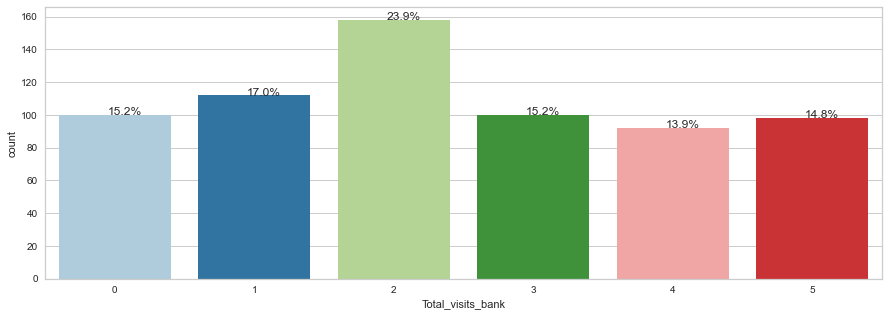

In [18]:
perc_on_bar('Total_visits_bank')

* 23.9% customers have visited the bank 2 times followed by 17% customers visiting 1 time

/Users/sajimon.baby/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


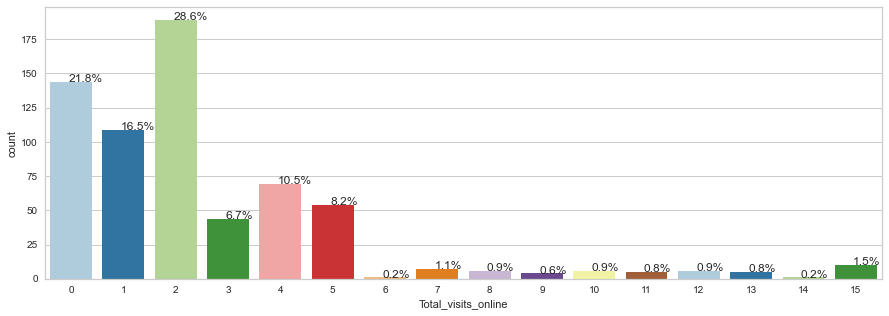

In [19]:
perc_on_bar('Total_visits_online')

* 28.6% customers have visited the bank online 2 times followed by 21.8% customers not having vistied the bank online 

/Users/sajimon.baby/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


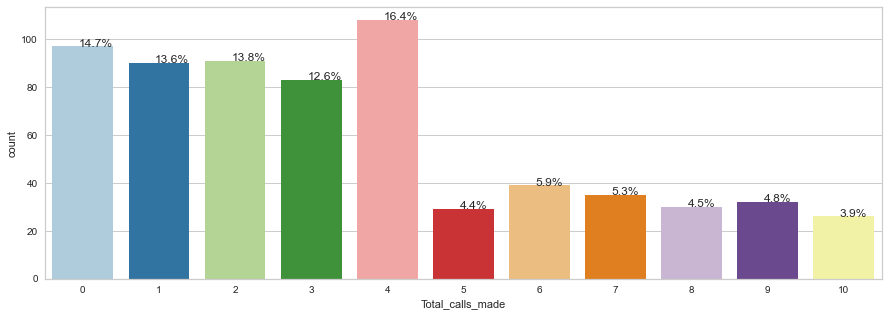

In [20]:
perc_on_bar('Total_calls_made')

* 16.4% customers have called the bank 4 times followed by 14.7% customers that have never called the bank

## Bivariate Analysis

In [21]:
data.corr() # finding correlations

Sl_No  Customer Key  Avg_Credit_Limit  \
Sl_No                1.000000      0.052886          0.677962   
Customer Key         0.052886      1.000000          0.068604   
Avg_Credit_Limit     0.677962      0.068604          1.000000   
Total_Credit_Cards   0.739329     -0.010281          0.608860   
Total_visits_bank    0.406438     -0.000560         -0.100312   
Total_visits_online  0.033916      0.022506          0.551385   
Total_calls_made    -0.684125      0.005968         -0.414352   

                     Total_Credit_Cards  Total_visits_bank  \
Sl_No                          0.739329           0.406438   
Customer Key                  -0.010281          -0.000560   
Avg_Credit_Limit               0.608860          -0.100312   
Total_Credit_Cards             1.000000           0.315796   
Total_visits_bank              0.315796           1.000000   
Total_visits_online            0.167758          -0.551861   
Total_calls_made              -0.651251          -0.506016   

                     Total_visits_online  Total_calls_made  
Sl_No                           0.033916         -0.684125  
Customer Key                    0.022506          0.005968  
Avg_Credit_Limit                0.551385         -0.414352  
Total_Credit_Cards              0.167758         -0.651251  
Total_visits_bank              -0.551861         -0.506016  
Total_visits_online             1.000000          0.127299  
Total_calls_made                0.127299          1.000000

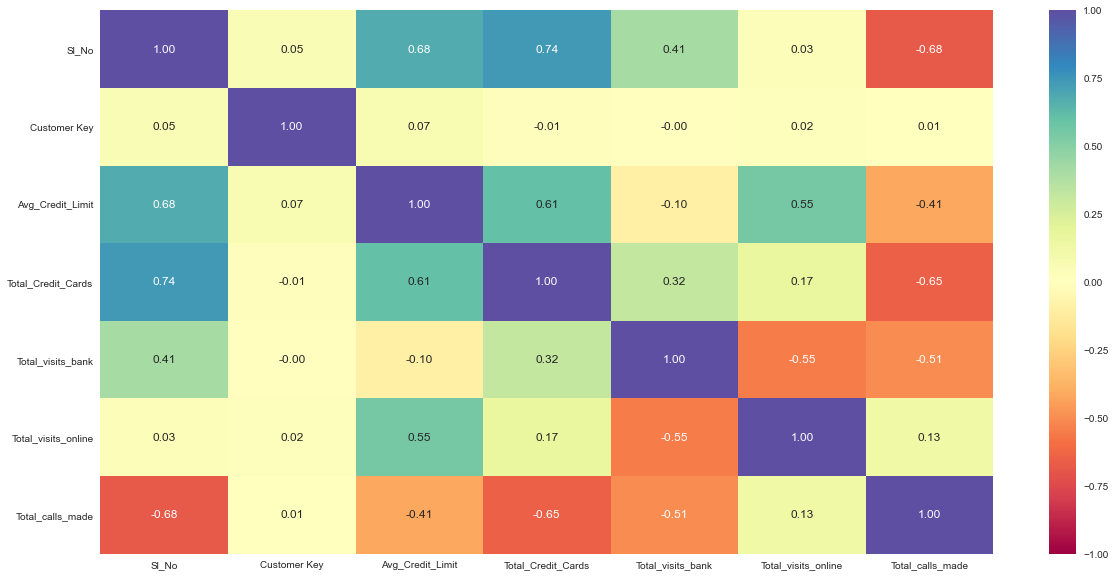

In [22]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral" )
plt.show()

### observations 
* Average credit limit and Sl no. have a strong positive correlation(0.68)
* Total credit cards  and Sl no. have a strong positive correlation(0.74)
* Total calls made and Sl no. have strong negative correlation (-0.68)
* Total visits to the bank and Sl no. have a positive correlation(0.41)
* Total credit cards and average limit have a strong positive correlation(0.61)
* Total visits online and average credit limit have a positive correlation(0.55)
* Total calls made and average credit limit have a negative correlation(-0.41)
* Total credit cards and Total calls made have a strong negative correlation(-0.65)
* Total visits to the bank and total visits online and total calls made have a negative correlation -0.55 and -0.51 respectively 

/Users/sajimon.baby/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/sajimon.baby/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/sajimon.baby/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpr

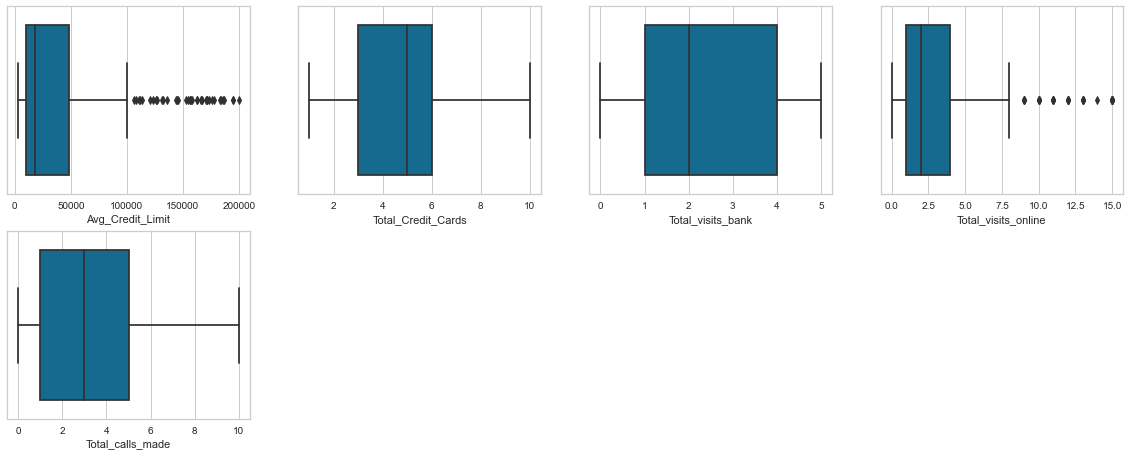

In [23]:
#plotting all the values in each columns 
plt.figure(figsize=(20,20))

pos = 1
for i in cat_cols:
    plt.subplot(5, 4, pos)
    sns.boxplot(data[i])
    pos += 1 


Average credit limit and total visists online have outliers 

## Outlier Treatment

In [24]:
for i in cat_cols:
    
    q1, q2, q3 = data[i].quantile([0.25,0.5,0.75])
    
    IQR = q3 - q1
    
    lower_cap=q1-1.5*IQR #whisker
    upper_cap=q3+1.5*IQR
    
    data[i]=data[i].apply(lambda x: upper_cap if x>(upper_cap) else (lower_cap if x<(lower_cap) else x))


/Users/sajimon.baby/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/sajimon.baby/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/sajimon.baby/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpr

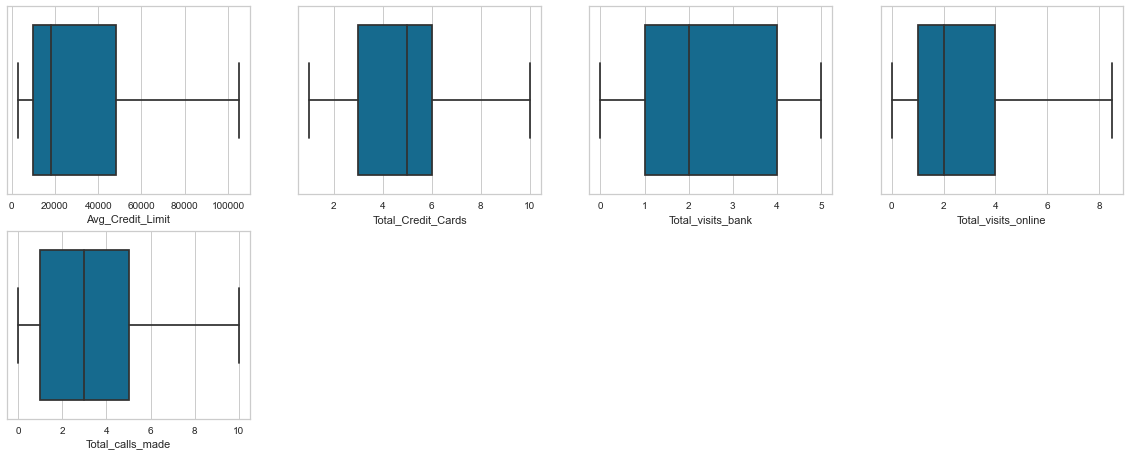

In [25]:
# plotting all the vlaues of the columns after outlier treatment
plt.figure(figsize=(20,20))

pos = 1
for i in cat_cols:
    plt.subplot(5, 4, pos)
    sns.boxplot(data[i])
    pos += 1 


There are no outliers in average credit limit and total visits online after outlier treatment 

## Scaling the data 

In [26]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
subset_scaled_data = pd.DataFrame(
    sc.fit_transform(data.drop(["Sl_No", "Customer Key"], axis=1)),
    columns=data.drop(["Sl_No", "Customer Key"], axis=1).columns,
)
subset_scaled_data.head()

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0          2.398942           -1.249225          -0.860451   
1          0.643619           -0.787585          -1.473731   
2          0.643619            1.058973          -0.860451   
3         -0.058511            0.135694          -0.860451   
4          2.398942            0.597334          -1.473731   

   Total_visits_online  Total_calls_made  
0            -0.619767         -1.251537  
1             2.705813          1.891859  
2             0.267054          0.145528  
3            -0.619767          0.145528  
4             2.705813         -0.203739

In [27]:
# List to store cluster and intra cluster distance

clusters = []
inertia_vals = [] 

for k in range(1, 15, 1):
    
    # train clustering with the specified K
    model = KMeans(n_clusters=k, random_state=10, n_jobs=-1)
    model.fit(subset_scaled_data)

    # append model to cluster list
    clusters.append(model)
    inertia_vals.append(model.inertia_)

/Users/sajimon.baby/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/Users/sajimon.baby/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/Users/sajimon.baby/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/Users/sajimon.baby/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warn

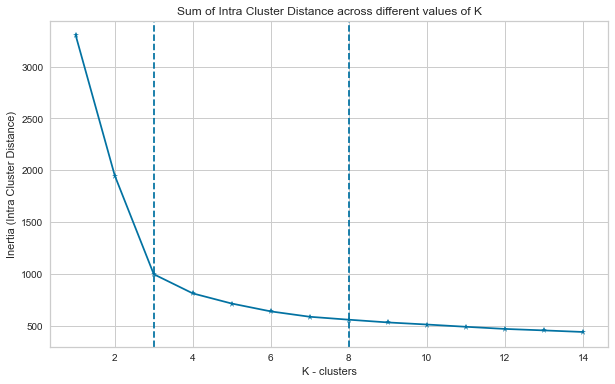

In [28]:
# plot the inertia vs K values

plt.figure(figsize=(10,6))
plt.plot(range(1,15,1),inertia_vals,marker='*')
plt.title("Sum of Intra Cluster Distance across different values of K")
plt.axvline(3, linestyle="--")
plt.axvline(8, linestyle="--")
plt.xlabel("K - clusters")
plt.ylabel("Inertia (Intra Cluster Distance)")
plt.show()

In [29]:
abs_diff=[]

for i in range(0,len(inertia_vals)-1):
    
    diff=round((inertia_vals[i]-inertia_vals[i+1])/inertia_vals[i],2)
    
    abs_diff.append(diff)

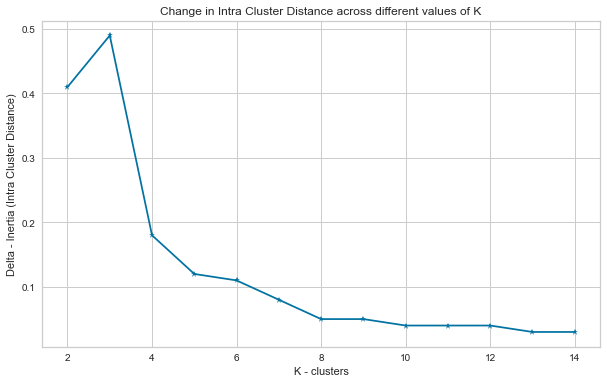

In [30]:
plt.figure(figsize=(10,6))
plt.plot(range(2,15,1),abs_diff,marker='*')
plt.title("Change in Intra Cluster Distance across different values of K")
plt.xlabel("K - clusters")
plt.ylabel("Delta - Inertia (Intra Cluster Distance)")
plt.show()

## silhouette score

In [31]:
from sklearn.metrics import silhouette_score

silhouette=[]

for i in range(1,14,1):
    
    print("---------------------------------------")
    print(clusters[i])
    print("Silhouette score:",silhouette_score(subset_scaled_data, clusters[i].predict(subset_scaled_data)))
    silhouette.append(round(silhouette_score(subset_scaled_data, clusters[i].predict(subset_scaled_data)),3))

---------------------------------------
KMeans(n_clusters=2, n_jobs=-1, random_state=10)
Silhouette score: 0.4201583924929177
---------------------------------------
KMeans(n_clusters=3, n_jobs=-1, random_state=10)
Silhouette score: 0.5169867470092899
---------------------------------------
KMeans(n_clusters=4, n_jobs=-1, random_state=10)
Silhouette score: 0.38147048130671246
---------------------------------------
KMeans(n_clusters=5, n_jobs=-1, random_state=10)
Silhouette score: 0.35332888701008774
---------------------------------------
KMeans(n_clusters=6, n_jobs=-1, random_state=10)
Silhouette score: 0.2710222807106636
---------------------------------------
KMeans(n_clusters=7, n_jobs=-1, random_state=10)
Silhouette score: 0.26756292821317423
---------------------------------------
KMeans(n_jobs=-1, random_state=10)
Silhouette score: 0.2585495689162854
---------------------------------------
KMeans(n_clusters=9, n_jobs=-1, random_state=10)
Silhouette score: 0.24487078218376862
--

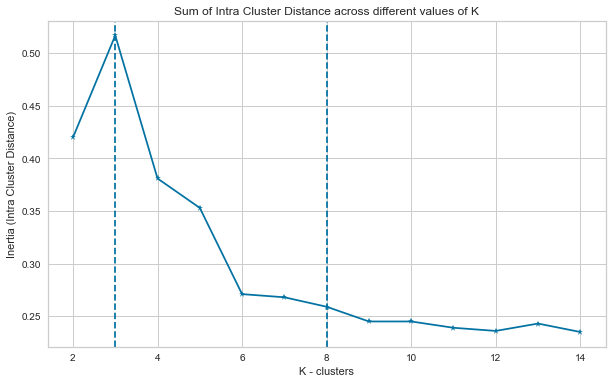

In [32]:
plt.figure(figsize=(10,6))
plt.plot(range(2,15,1),silhouette,marker='*')
plt.title("Sum of Intra Cluster Distance across different values of K")
plt.axvline(3, linestyle="--")
plt.axvline(8, linestyle="--")
plt.xlabel("K - clusters")
plt.ylabel("Inertia (Intra Cluster Distance)")
plt.show()

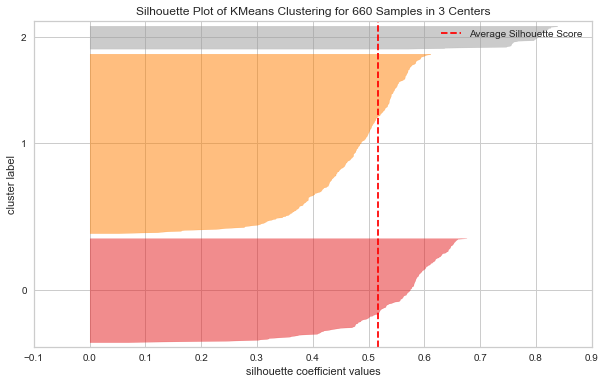

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [33]:
plt.figure(figsize=(10,6))

visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))

visualizer.fit(subset_scaled_data)

visualizer.show()

The average silhouetter score is almost 0.5

In [34]:
## creating a new dataframe only for labels and converting it into categorical variable


kmeans = KMeans(n_clusters=3, random_state=1)

kmeans.fit(subset_scaled_data)

data_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

data_labels['labels'] = data_labels['labels'].astype('category')

# Joining the label dataframe with the data frame.
data_labeled = data.join(data_labels)

data_labeled['labels'].value_counts()

1    386
0    224
2     50
Name: labels, dtype: int64

 * There are 224 customers in cluster 0 
 * There are 386 customers in cluster 1
 * only 50 customers in cluster 2

In [35]:
data_labeled.head() # first 5 entries after labeling into clusters

Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
0      1         87073          100000.0                   2   
1      2         38414           50000.0                   3   
2      3         17341           50000.0                   7   
3      4         40496           30000.0                   5   
4      5         47437          100000.0                   6   

   Total_visits_bank  Total_visits_online  Total_calls_made labels  
0                  1                  1.0                 0      1  
1                  0                  8.5                 9      0  
2                  1                  3.0                 4      1  
3                  1                  1.0                 4      1  
4                  0                  8.5                 3      2

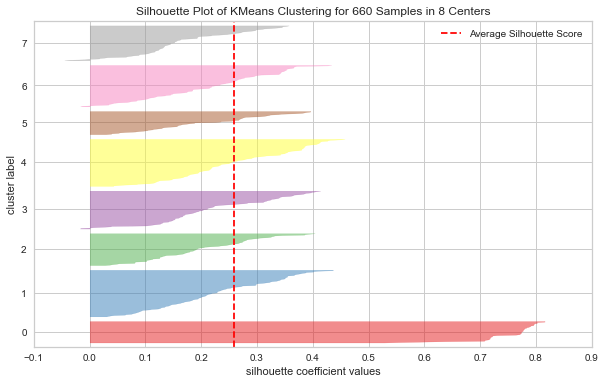

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [36]:
plt.figure(figsize=(10,6))

visualizer = SilhouetteVisualizer(KMeans(8, random_state=1))

visualizer.fit(subset_scaled_data)
visualizer.show()

The average silhouette score is 0.25 

In [37]:
## creating a new dataframe only for labels and converting it into categorical variable


kmeans = KMeans(n_clusters=8, random_state=1)

kmeans.fit(subset_scaled_data)

data_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

data_labels['labels'] = data_labels['labels'].astype('category')

# Joining the label dataframe with the data frame.
data_labeled = data.join(data_labels)

data_labeled['labels'].value_counts()

4    109
1    108
6     96
3     88
7     81
2     74
5     54
0     50
Name: labels, dtype: int64

* There are 50 customers in cluster 0 
* There are 108 customers in cluster 1
* There are 74 customers in cluster 2
* There are 88 customers in cluster 3
* There are 109 customers in cluster 4
* There are 54 customers in cluster 5
* There are 96 customers in cluster 6
* only 81 customers in cluster 7 

In [38]:
data_labels.head()# first 5 entries cluster labels

labels
0      3
1      5
2      3
3      1
4      0

In [39]:
##Scale the data
#scaled_labels= data_labeled.copy()
#scaled_labels = data[cat_cols].apply(zscore)
#scaled_labels.head()

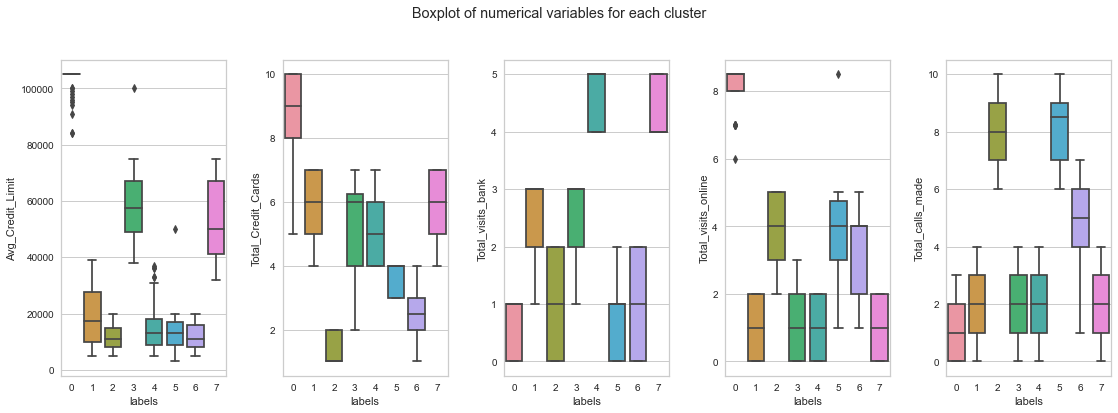

In [40]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of numerical variables for each cluster")
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=data_labeled[cat_cols[counter]], x=data_labeled["labels"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

<AxesSubplot:xlabel='labels'>

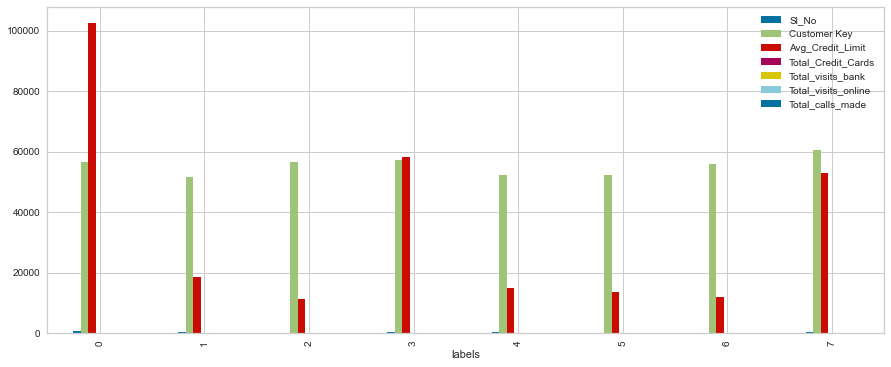

In [41]:
data_labeled.groupby("labels").mean().plot.bar(figsize=(15, 6))

### Observation

* Cluster 0 - Customers with higher average credit limits they could be company heads,jobs that allow for a higher pay and transaction having a pay > 100000
* Cluster 3 and 7 - Customers having medium average credit limits they could have jobs  paying  below 60000
* Cluster 1,2,4,5,6 - Customers having low average Credit limits they could be having jobs paying below 20000

## Heirarchical Clustering 

In [42]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_data, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_data))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.6666982080229052.
Cophenetic correlation for Euclidean distance and complete linkage is 0.8207884321476555.
Cophenetic correlation for Euclidean distance and average linkage is 0.8926672966587861.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8872365340578665.
Cophenetic correlation for Chebyshev distance and single linkage is 0.6882876568342585.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.7672199195985938.
Cophenetic correlation for Chebyshev distance and average linkage is 0.8907216945489854.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.782728724334691.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.6583934280485623.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.3884943792102948.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.7998609088477291.
Cophenetic cor

In [43]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8926672966587861, which is obtained with Euclidean distance and average linkage.


## Cophenetic correlation with Euclidean Distances

In [44]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_data, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_data))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.6666982080229052.
Cophenetic correlation for complete linkage is 0.8207884321476555.
Cophenetic correlation for average linkage is 0.8926672966587861.
Cophenetic correlation for centroid linkage is 0.8880634847869346.
Cophenetic correlation for ward linkage is 0.7702265240776373.
Cophenetic correlation for weighted linkage is 0.8872365340578665.


In [45]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8926672966587861, which is obtained with average linkage.


## Visualising the dendograms for Euclidean

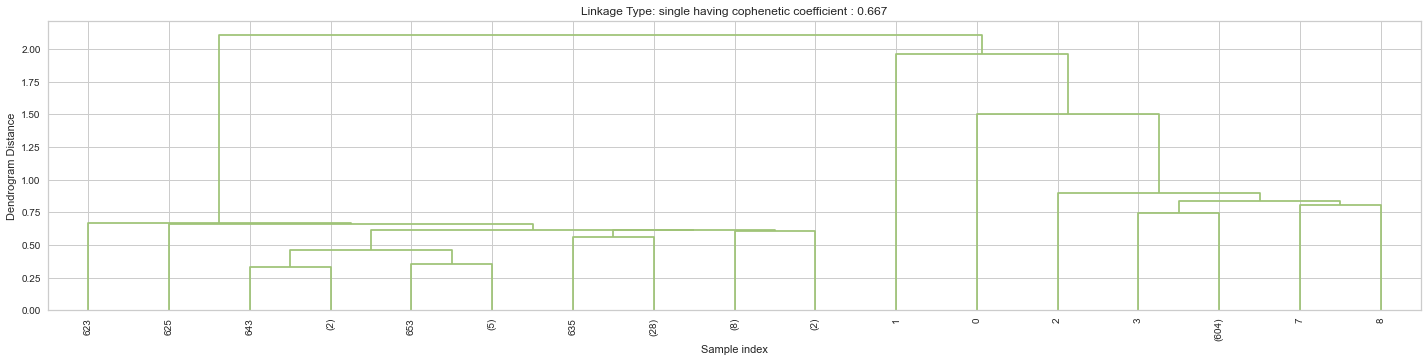

single 0.6666982080229052


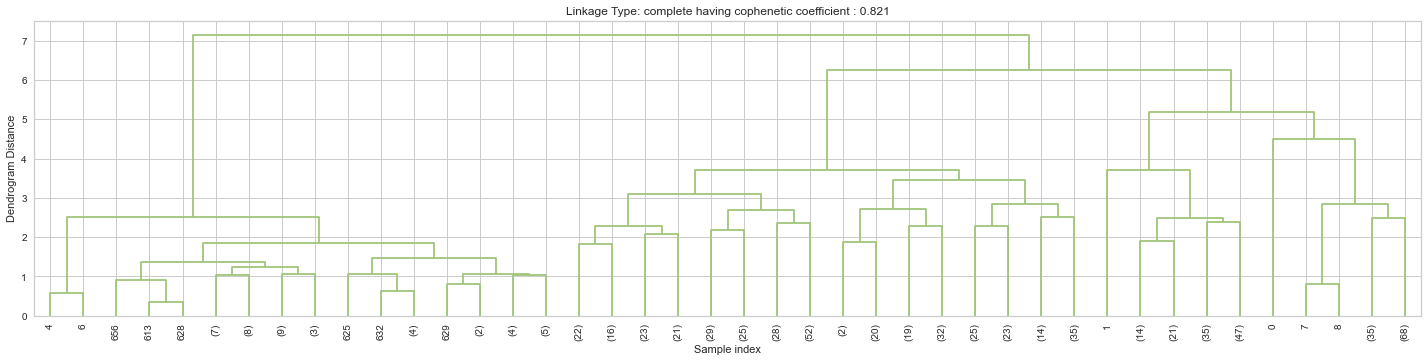

complete 0.8207884321476555


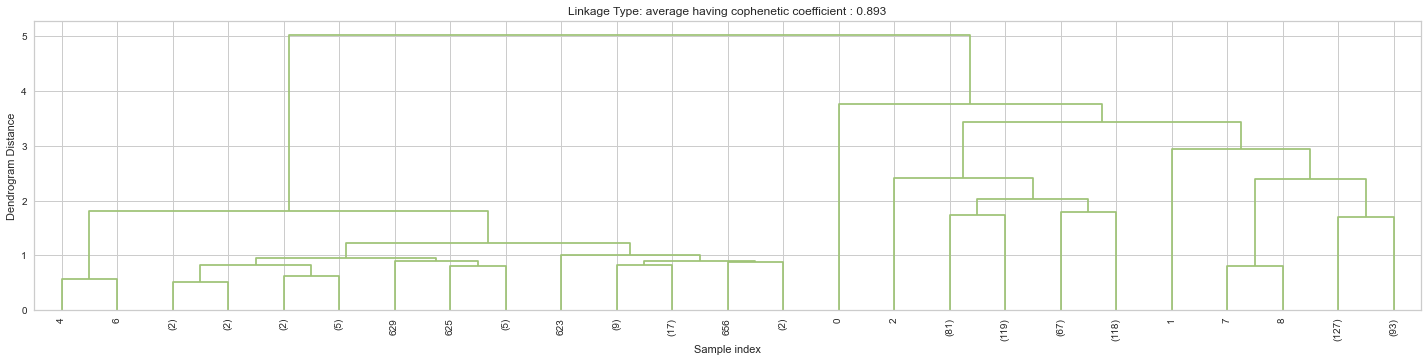

average 0.8926672966587861


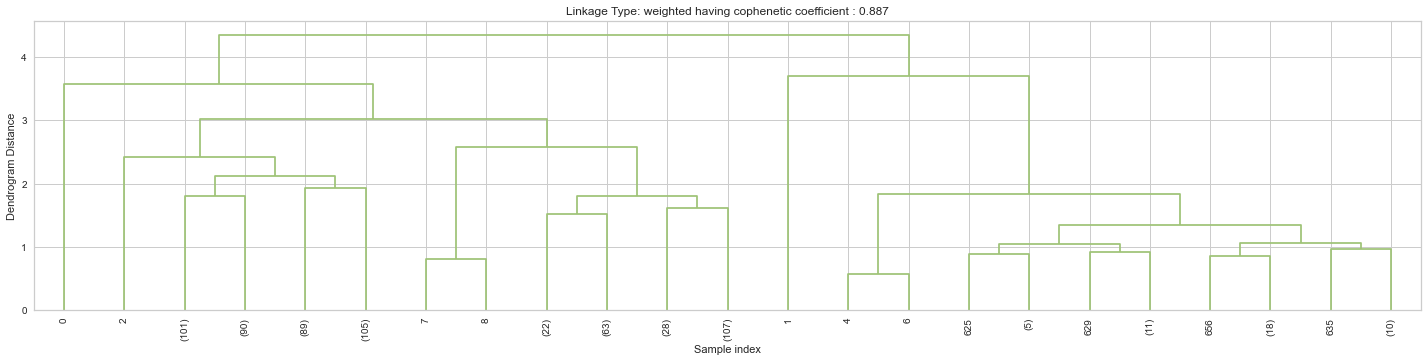

weighted 0.8872365340578665


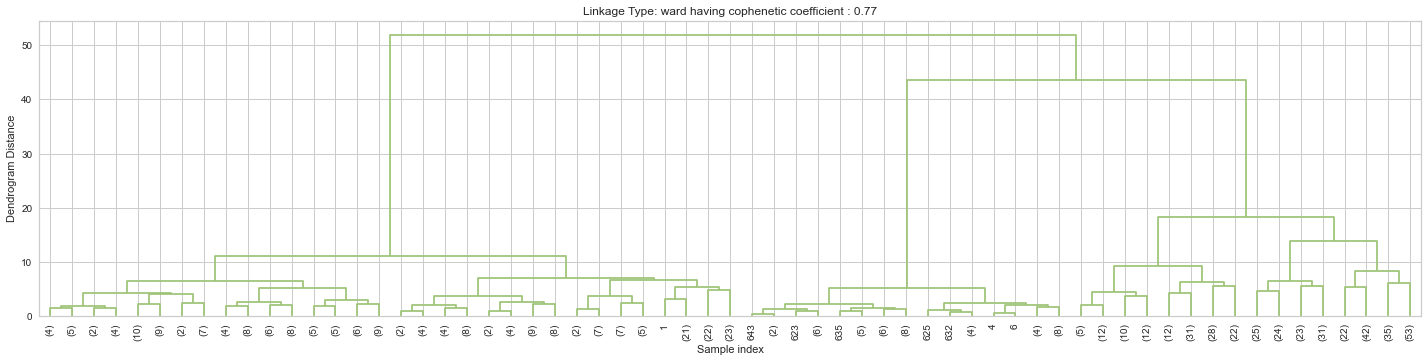

ward 0.7702265240776373


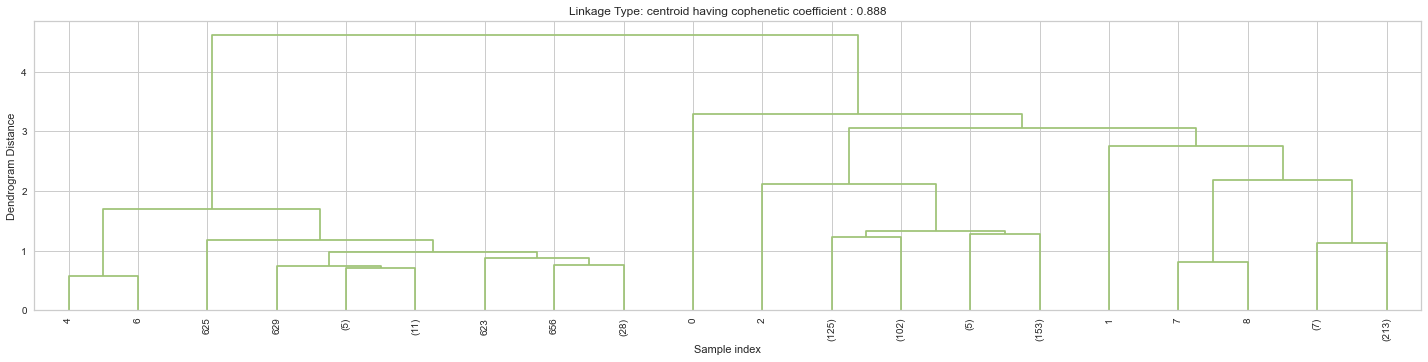

centroid 0.8880634847869346


In [46]:
linkage_methods=['single','complete','average','weighted','ward','centroid']

results_cophenetic_coef=[]

for i in linkage_methods:
    
    plt.figure(figsize=(20, 5))
    
    plt.xlabel('Sample index')
    plt.ylabel('Dendrogram Distance')
    
#      Z = linkage(subset_scaled_df, metric='chebyshev', method=lm)
    
    Z = linkage(subset_scaled_data, i) #-------------------Default is Euclidean
    
    cc,cophn_dist=cophenet(Z,pdist(subset_scaled_data))
    
    dendrogram(Z,leaf_rotation=90.0,p=5,leaf_font_size=10,truncate_mode='level',color_threshold=60)
    
    #Z - is the linkage matrix
    #leaf_rotation - Angle of leaf labels. Check how data is displayed in the x axis in the image below
    #p - No more than p levels of the dendrogram tree are displayed. 
    #A “level” includes all nodes with p merges from the last merge.
    
    
    plt.tight_layout()
    
    plt.title("Linkage Type: "+ i +" having cophenetic coefficient : "+str(round(cc,3)) )
    
    plt.show()
    results_cophenetic_coef.append((i,cc))
    print (i,cc)

In [47]:
results_cophenetic_coef_data=pd.DataFrame(results_cophenetic_coef,columns=['LinkageMethod','CopheneticCoefficient'])
results_cophenetic_coef_data

LinkageMethod  CopheneticCoefficient
0        single               0.666698
1      complete               0.820788
2       average               0.892667
3      weighted               0.887237
4          ward               0.770227
5      centroid               0.888063

In [48]:
Z = linkage(subset_scaled_data, metric='euclidean', method='average')

## Clustering 

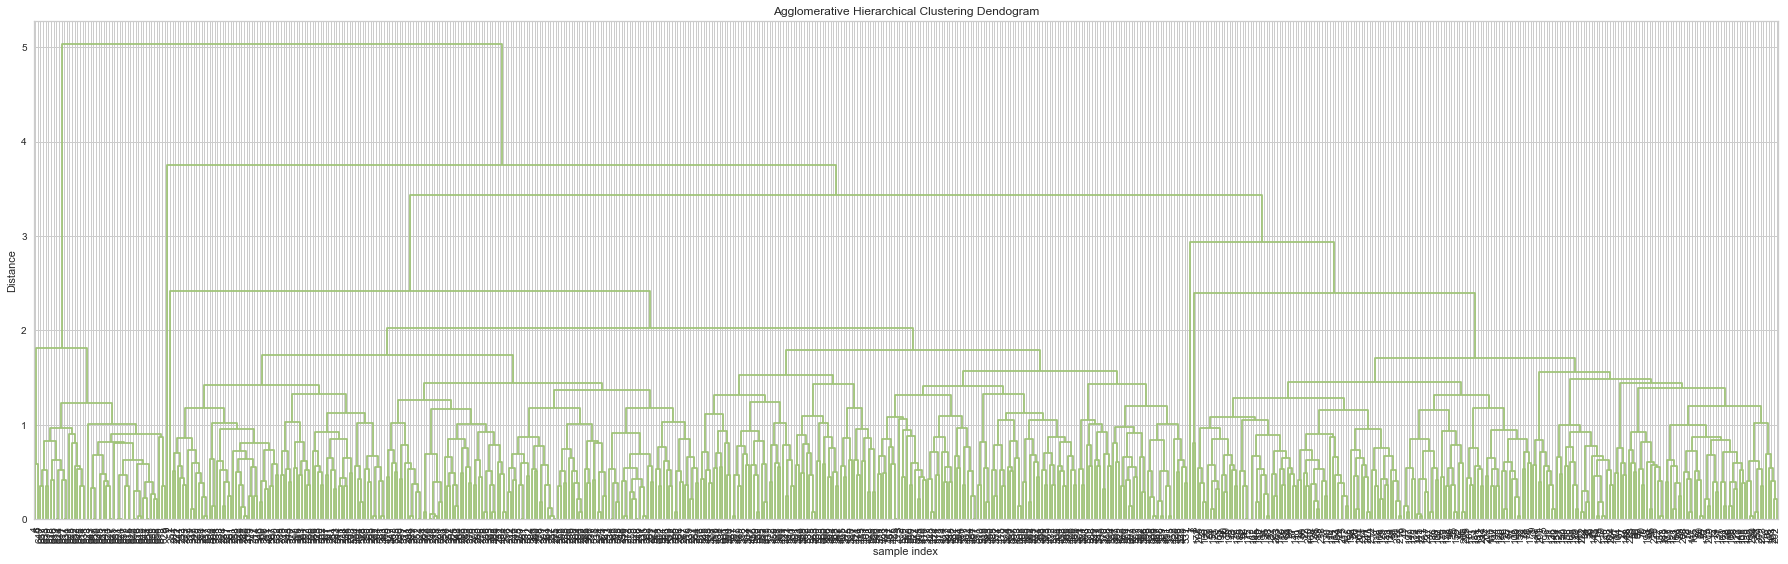

In [49]:
plt.figure(figsize=(25, 8))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')

dendrogram(Z,leaf_rotation=90.0, leaf_font_size=10, truncate_mode='level', color_threshold=6.3)

plt.axhline(y=6.3,color='red')

plt.tight_layout()

In [50]:
df1=data.copy() #copying data 

df1.head()

Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
0      1         87073          100000.0                   2   
1      2         38414           50000.0                   3   
2      3         17341           50000.0                   7   
3      4         40496           30000.0                   5   
4      5         47437          100000.0                   6   

   Total_visits_bank  Total_visits_online  Total_calls_made  
0                  1                  1.0                 0  
1                  0                  8.5                 9  
2                  1                  3.0                 4  
3                  1                  1.0                 4  
4                  0                  8.5                 3

In [51]:
for i in range(2,15):
    model = AgglomerativeClustering(n_clusters=i, affinity='euclidean',  linkage='average')
    model.fit(subset_scaled_data)
    df1['labels'] = model.labels_
    print("K=",i,"-",round(silhouette_score(subset_scaled_data, df1['labels']),3))

K= 2 - 0.517
K= 3 - 0.344
K= 4 - 0.481
K= 5 - 0.445
K= 6 - 0.318
K= 7 - 0.268
K= 8 - 0.252
K= 9 - 0.233
K= 10 - 0.226
K= 11 - 0.23
K= 12 - 0.195
K= 13 - 0.195
K= 14 - 0.175


In [52]:
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean',  linkage='average')
model.fit(subset_scaled_data)

AgglomerativeClustering(linkage='average', n_clusters=4)

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

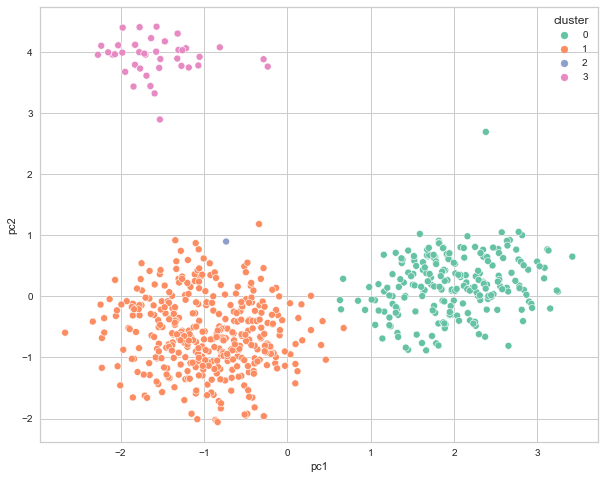

In [53]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2, random_state=7)
principalComponents = pca.fit_transform(subset_scaled_data)
X_std = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2'])



X_std['cluster']=model.labels_
df1['cluster']=model.labels_
X_std.head()
plt.figure(figsize=(10,8))
sns.scatterplot(x=X_std.pc1, y=X_std.pc2, hue=X_std.cluster, palette="Set2")


In [54]:
X_std['cluster'].value_counts()

1    386
0    223
3     50
2      1
Name: cluster, dtype: int64

standard deviation in :

* cluster 0 is 223
* cluster 1 is 386
* cluster 2 is 1
* cluster 3 is 50

## Principal components

In [55]:
pca_df = data.drop(['Sl_No','Customer Key'], axis=1)# dropping unwanter columns

In [56]:
pca_df.shape# To get the shape of the data set

(660, 5)

In [57]:
# Scalling the data set
sc = StandardScaler()
pca_std = pd.DataFrame(sc.fit_transform(pca_df),columns=pca_df.columns)

pca_std.head()

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0          2.398942           -1.249225          -0.860451   
1          0.643619           -0.787585          -1.473731   
2          0.643619            1.058973          -0.860451   
3         -0.058511            0.135694          -0.860451   
4          2.398942            0.597334          -1.473731   

   Total_visits_online  Total_calls_made  
0            -0.619767         -1.251537  
1             2.705813          1.891859  
2             0.267054          0.145528  
3            -0.619767          0.145528  
4             2.705813         -0.203739

In [58]:
pca=PCA(n_components=5, random_state=7) 
principalComponents = pca.fit_transform(pca_std)

variance=pca.explained_variance_ratio_

print("Variance explained by each component")

j=1
for i in variance:
    print("PC",j,":",round(i*100,2))
    j+=1



Variance explained by each component
PC 1 : 47.2
PC 2 : 34.52
PC 3 : 6.51
PC 4 : 6.21
PC 5 : 5.56


* 71.72% variance is explained by PC1 and PC2 alone

In [59]:
data_var = pd.DataFrame(variance).reset_index()
data_var[0]=round(data_var[0]*100,2)
data_var.head()

index      0
0      0  47.20
1      1  34.52
2      2   6.51
3      3   6.21
4      4   5.56

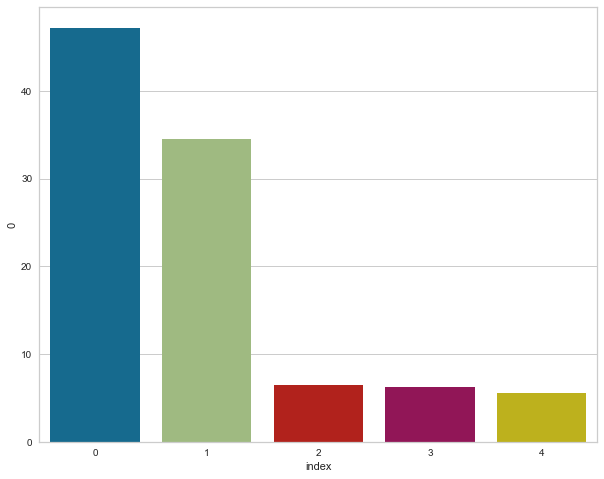

In [60]:
plt.figure(figsize=(10,8));
sns.barplot(x=data_var['index'],y=data_var[0]);

index 0 and 1 explain the most variance

In [61]:
pca=PCA(n_components=5, random_state=7)

principalComponents = pca.fit_transform(pca_std)


pca_std = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2','pc3','pc4','pc5'])

In [62]:
pca_std.head()

pc1       pc2       pc3       pc4       pc5
0 -0.734723  0.899287  2.703778  0.838429 -0.802747
1  2.380586  2.694705 -0.696136  0.669049 -0.496104
2 -0.339927  1.185279  0.038852 -0.085190  0.916153
3  0.282966  0.009492  0.616228 -0.216924  0.812741
4 -0.285443  3.885192  0.154630  0.305353 -0.594306

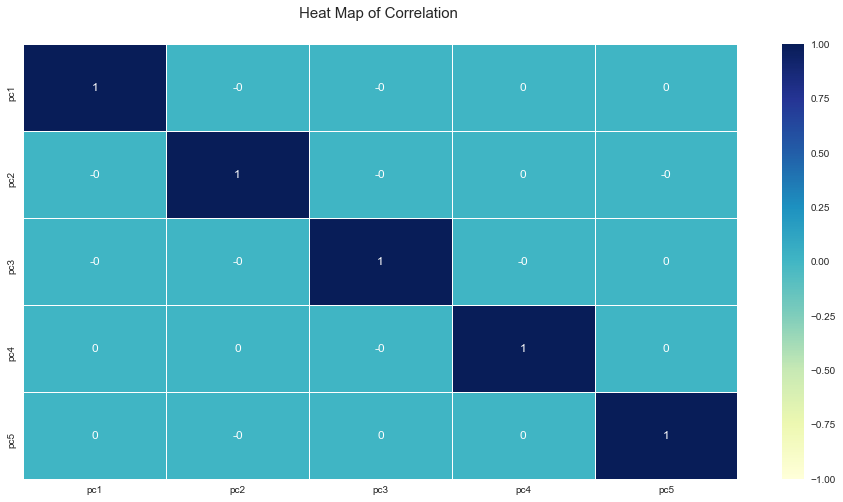

In [63]:
coor_chd_data = pca_std.corr().round(2);

fig, ax = plt.subplots()
fig.set_size_inches(16, 8)

#Plotting a heat map of different variables
plt.title('Heat Map of Correlation \n',fontsize=15, pad=10)

sns.heatmap(coor_chd_data,annot=True,cmap='YlGnBu',vmin=-1,vmax=1, linewidths=.5, center=0);

In [64]:
Z = linkage(pca_std, metric='euclidean', method='average')

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

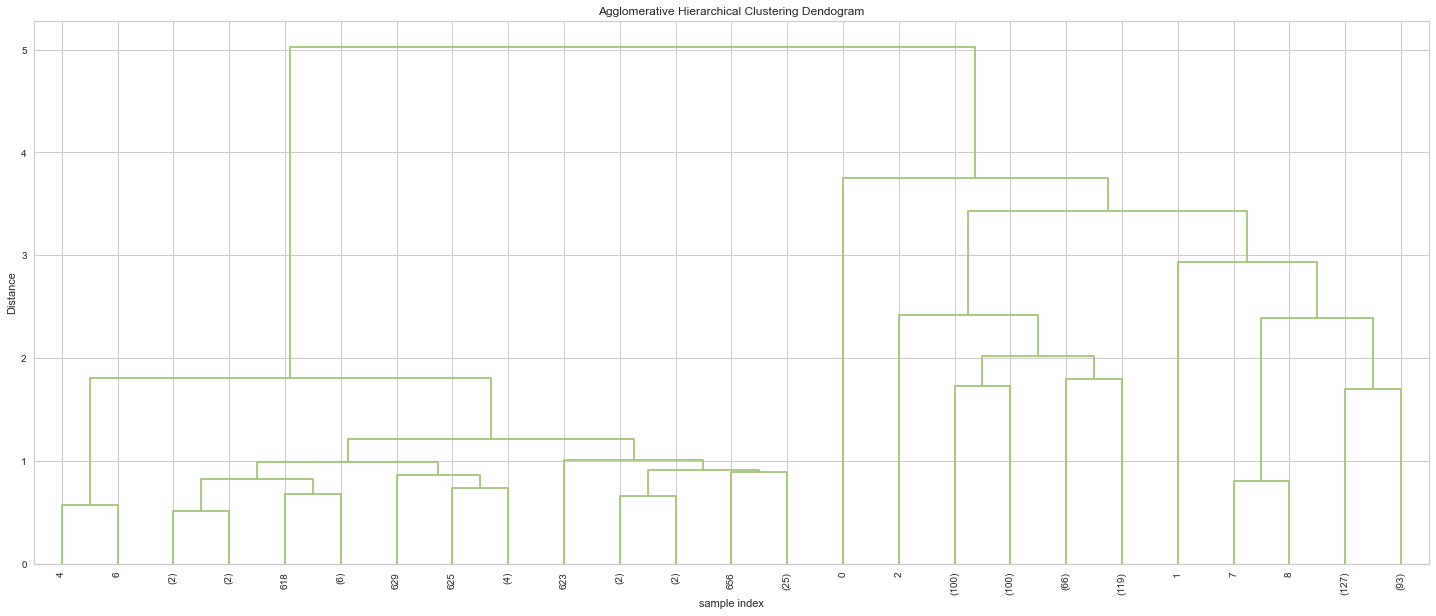

In [65]:
plt.figure(figsize=(25, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z,leaf_rotation=90.0,p=5,leaf_font_size=10,truncate_mode='level', color_threshold=5.5)
plt.tight_layout

In [66]:
for i in range(2,10):
    model = AgglomerativeClustering(n_clusters=i, affinity='euclidean',  linkage='average')
    model.fit(pca_std)
    pca_std['labels'] = model.labels_
    print("K=",i,"-",silhouette_score(pca_std, pca_std['labels']))

K= 2 - 0.5271400410856542
K= 3 - 0.42919106155802794
K= 4 - 0.5080223541740154
K= 5 - 0.5230766819352789
K= 6 - 0.4131962386886031
K= 7 - 0.504069394692839
K= 8 - 0.41940171845519775
K= 9 - 0.4097108500906266


<AxesSubplot:xlabel='pc1', ylabel='pc2'>

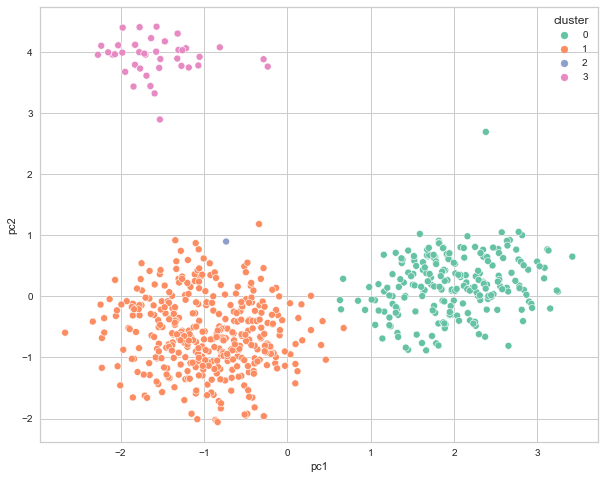

In [67]:
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean',  linkage='average')
model.fit(pca_std)

pca_std['labels'] = model.labels_

plt.figure(figsize=(10,8))
sns.scatterplot(x=pca_std.pc1, y=pca_std.pc2, hue=X_std.cluster, palette="Set2")

    

In [68]:
pca_std['labels'].value_counts()

0    607
2     48
1      3
3      2
Name: labels, dtype: int64

stadard deviation :
* cluster 0 has 607
* cluster 1 has 3
* cluster 2 has 48
* cluster 3 has 2 


In [69]:
data['Clusters']=model.labels_

data.head()# first 5 entries of the dataset 

Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
0      1         87073          100000.0                   2   
1      2         38414           50000.0                   3   
2      3         17341           50000.0                   7   
3      4         40496           30000.0                   5   
4      5         47437          100000.0                   6   

   Total_visits_bank  Total_visits_online  Total_calls_made  Clusters  
0                  1                  1.0                 0         1  
1                  0                  8.5                 9         0  
2                  1                  3.0                 4         0  
3                  1                  1.0                 4         0  
4                  0                  8.5                 3         3

In [70]:
data.groupby("Clusters").median()

Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
Clusters                                                              
0         309.0       53851.0           17000.0                 4.0   
1           8.0       82490.0           15000.0                 2.0   
2         636.5       54205.5          105000.0                 9.0   
3           6.0       47903.5          100000.0                 5.5   

          Total_visits_bank  Total_visits_online  Total_calls_made  
Clusters                                                            
0                       2.0                  2.0               3.0  
1                       0.0                  1.0               1.0  
2                       1.0                  8.5               1.0  
3                       0.0                  8.5               2.5

## Cluster Profiling

In [71]:
cluster_profile = data.groupby("Clusters").mean()

In [72]:
cluster_profile["count_in_each_segments"] = (
    data.groupby("Clusters")["Total_Credit_Cards"].count().values
)

In [73]:
# let's see the average credit limit in each cluster
for cl in data["Clusters"].unique():
    print(
        "The",
        data[data["Clusters"] == cl]["Avg_Credit_Limit"].nunique(),
        "average credit limits in the  in cluster",
        cl,
        "are:",
    )
    print(data[data["Clusters"] == cl]["Avg_Credit_Limit"].unique())
    print("-" * 100, "\n")

The 3 average credit limits in the  in cluster 1 are:
[100000.  15000.   5000.]
---------------------------------------------------------------------------------------------------- 

The 67 average credit limits in the  in cluster 0 are:
[50000. 30000. 20000.  3000. 10000. 13000. 11000.  9000.  6000.  8000.
 15000. 19000.  5000. 16000. 18000. 17000. 14000. 12000.  7000. 73000.
 49000. 67000. 61000. 75000. 48000. 56000. 72000. 70000. 51000. 69000.
 40000. 44000. 31000. 37000. 65000. 46000. 74000. 58000. 39000. 52000.
 33000. 47000. 71000. 41000. 59000. 64000. 45000. 54000. 66000. 27000.
 43000. 36000. 25000. 57000. 26000. 38000. 35000. 34000. 28000. 63000.
 29000. 68000. 42000. 62000. 32000. 60000. 55000.]
---------------------------------------------------------------------------------------------------- 

The 1 average credit limits in the  in cluster 3 are:
[100000.]
---------------------------------------------------------------------------------------------------- 

The 9 average c

In [74]:
# lets display cluster profile
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

IndexError: list index out of range

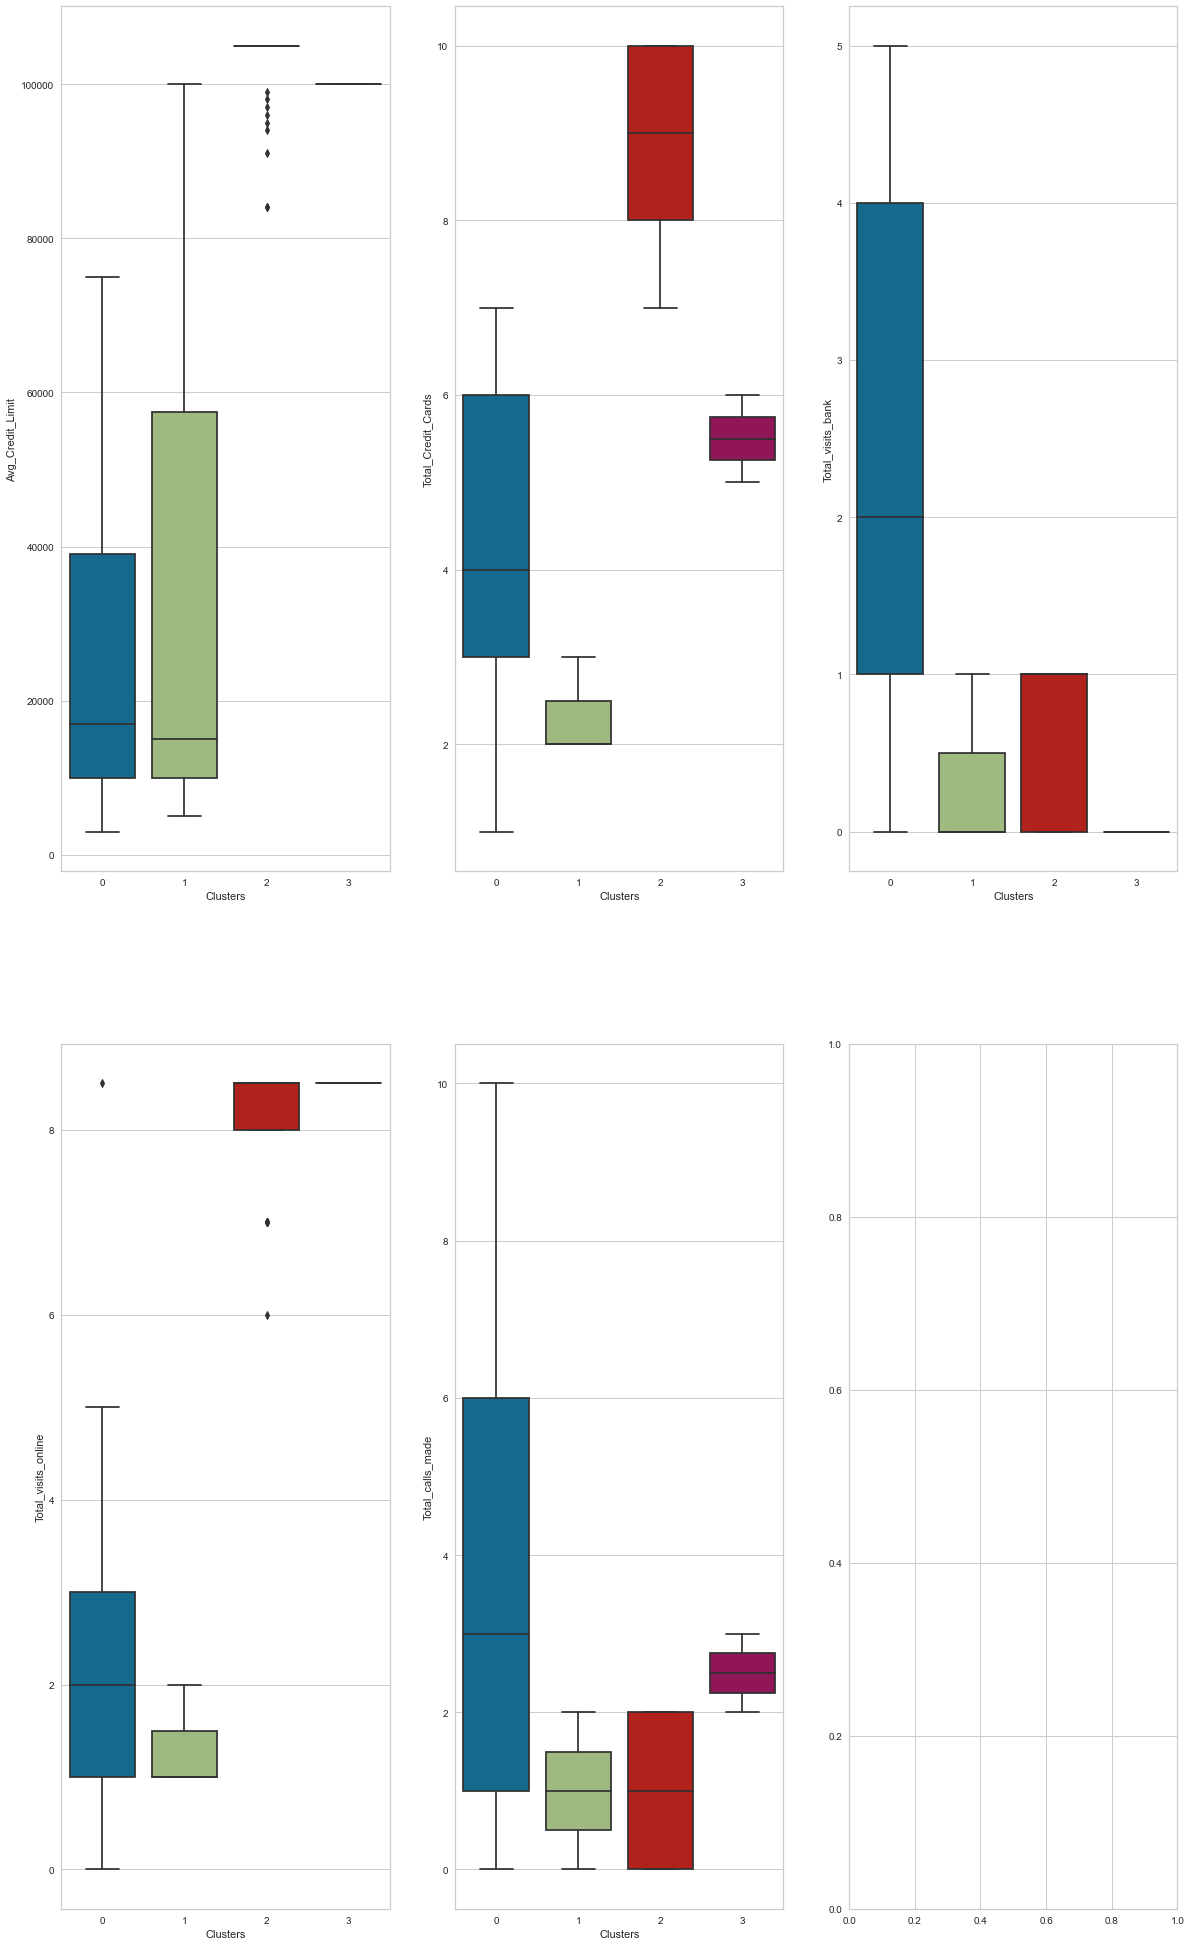

In [75]:
fig, axes = plt.subplots(2, 3, figsize=(20, 35))


counter = 0

for ii in range(5):
    sns.boxplot(
        ax=axes[ii][0],
        y=data[cat_cols[counter]],
        x=data["Clusters"],
    )
    counter = counter + 1
    sns.boxplot(
        ax=axes[ii][1],
        y=data[cat_cols[counter]],
        x=data["Clusters"],
    )
    counter = counter + 1
    sns.boxplot(
        ax=axes[ii][2],
        y=data[cat_cols[counter]],
        x=data["Clusters"],
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

IndexError: list index out of range

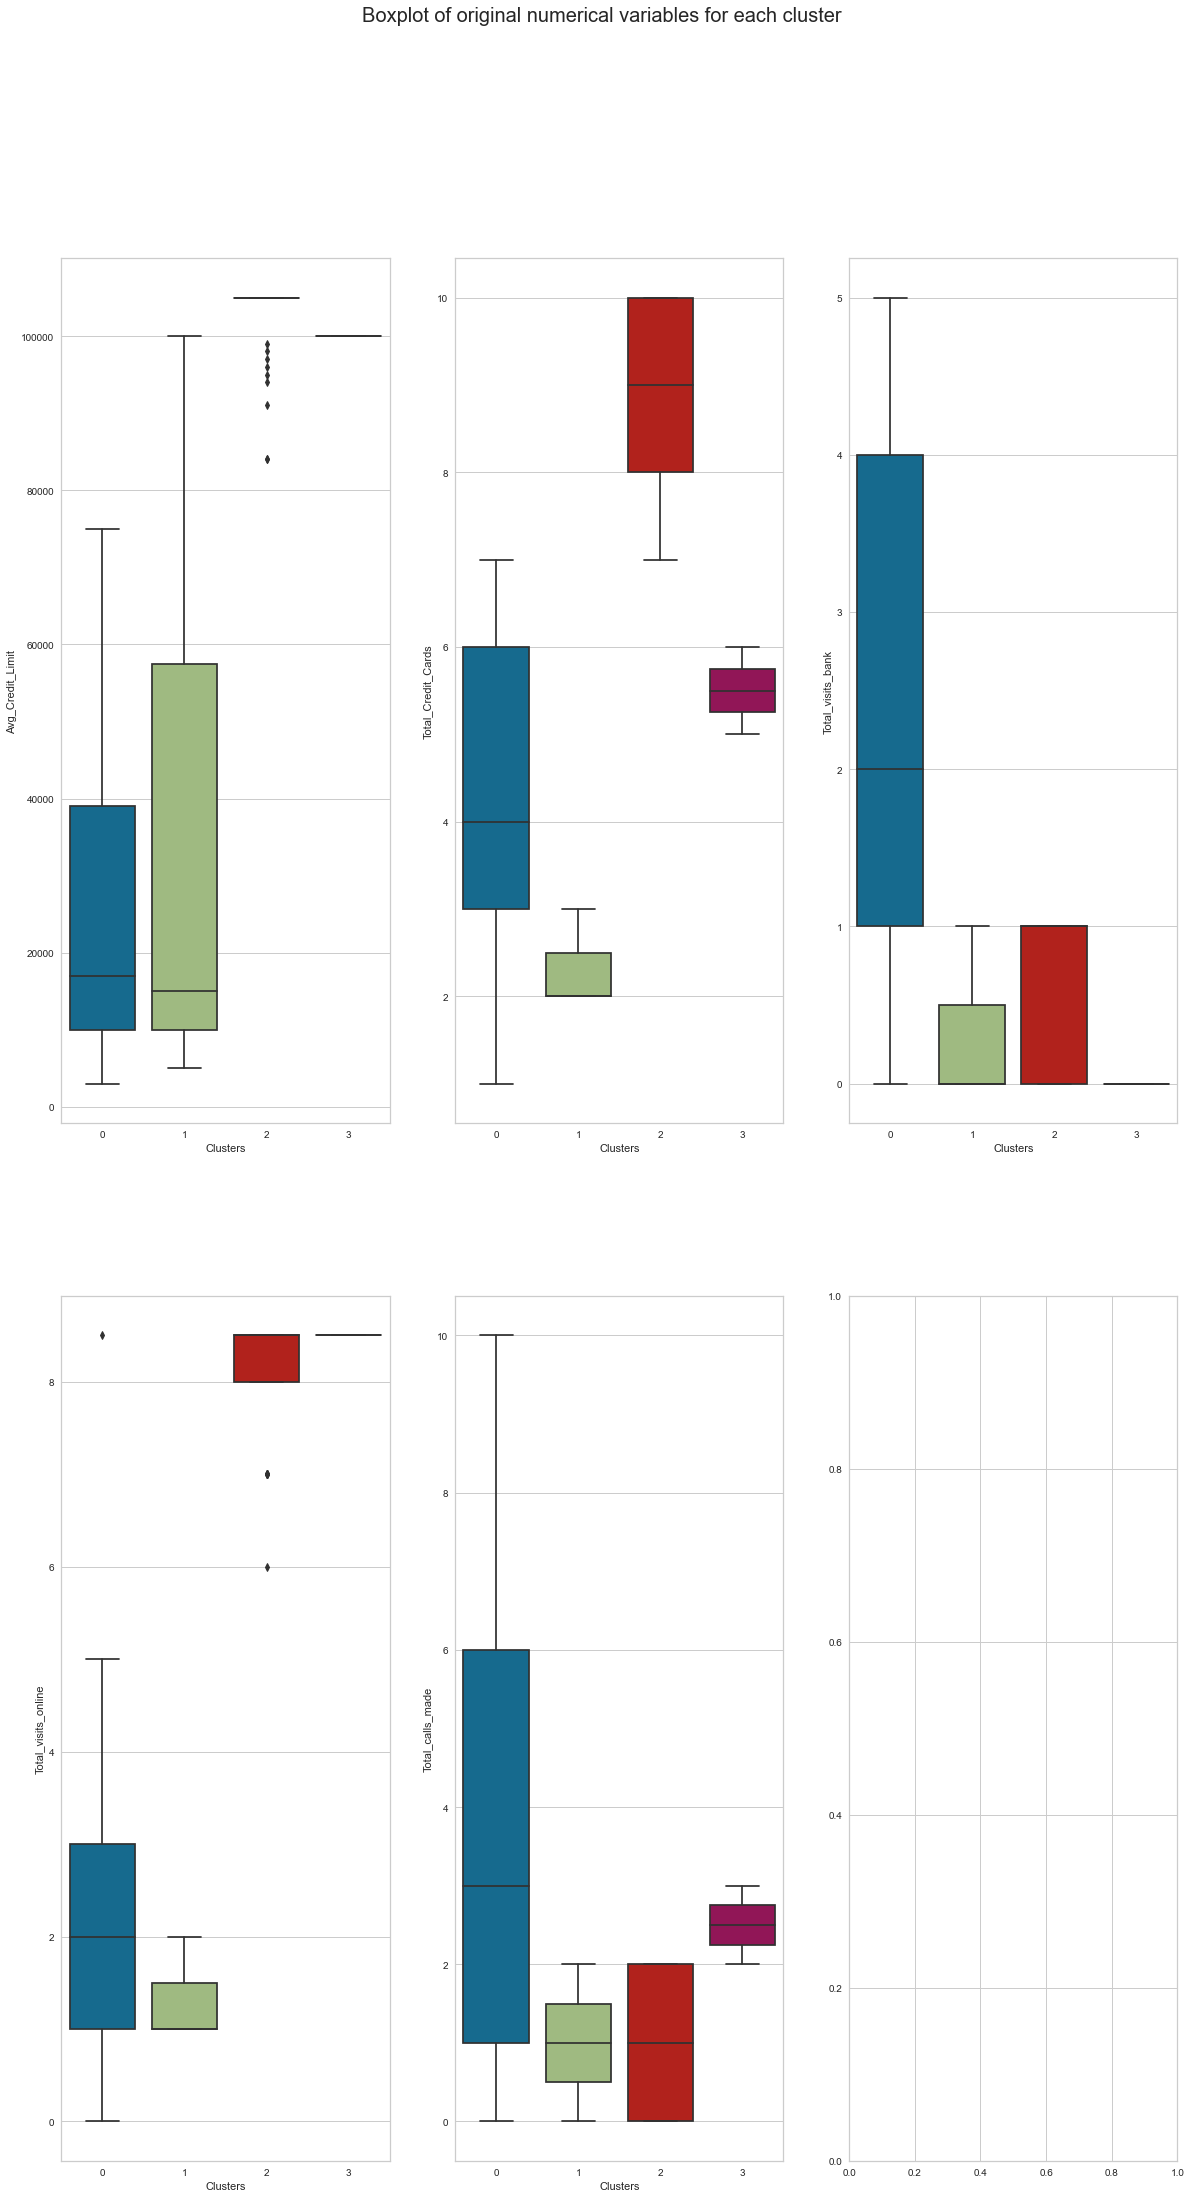

In [76]:
fig, axes = plt.subplots(2, 3, figsize=(20, 35))
fig.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii][0], y=data[cat_cols[counter]], x=data["Clusters"])
    counter = counter + 1
    sns.boxplot(ax=axes[ii][1], y=data[cat_cols[counter]], x=data["Clusters"])
    counter = counter + 1
    sns.boxplot(ax=axes[ii][2], y=data[cat_cols[counter]], x=data["Clusters"])
    counter = counter + 1


fig.tight_layout(pad=2.0)

* Clusters 0 and 1 can be looked into 

### Cluster 0 

* customers having average credit limit < 20000
* customers having 4 credit cards 
* customers that have come to the bank twice 
* customers that have visited the bank online twice
* and have made atleast 3 call to the bank  

### Cluster 1

* customers having average credit limit << 20000
* customers having 2 credit cards 
* customers that have not come to the bank  
* customers that have visited the bank online once
* and have made atleast 1 call to the bank 

## Recommendation 

**67 average credit limits in cluster 0 would provide a better market for the bank and  help provide better service for these customers.**